In [1]:
import apogee.tools.read as apread
import gaia_tools.load as gload
from gaia_tools import xmatch
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as pyfits # for reading distance file
%pylab inline

from matplotlib.colors import LogNorm # log-scaled 2D histograms
default_cmap='viridis' # for 2D histograms

# Set global MPL parameters
fs = 18
import matplotlib
font = {'family': 'serif',
        'weight': 'normal',
        'size'  :  fs
        }
matplotlib.rc('font',**font)

Populating the interactive namespace from numpy and matplotlib


## Choose current DR

In [2]:
from apogee.tools.path import change_dr
change_dr('current')

## Define a nice 2D hist plotting function

In [3]:
def hist2d(fig,ax,x,y,bins=100,clabel=False,vmin=0,vmax=110,norm='lin'):
    """
    Create a 2D histogram of data represented by the two dimensions x and y
    
    fig:      Figure to plot in
    ax:       Subplot object to plot in
    x:        Array of data values in 'x'
    y:        Array of data values in 'y'
    bins:     Number of bins in which to divide each axis
    clabel:   Label for the colourbar - no colourbar is plotted if this is not given
    vmin:     Minimum value of the histogram
    vmax:     Maximum value of the histogram
    
    """
    # Create histogram
    H,xedges,yedges = np.histogram2d(x,y,bins=bins)
    # Reorient appropriately
    H = np.rot90(H)
    H = np.flipud(H)
    # Mask where bins are empty
    Hmasked = np.ma.masked_where(H==0,H)
    # Plot histogram
    if norm == 'lin':
        im = ax.pcolormesh(xedges,yedges,Hmasked,
                           cmap = plt.get_cmap(default_cmap),
                           vmin=vmin,vmax=vmax)
    elif norm == 'log':
            im = ax.pcolormesh(xedges,yedges,Hmasked,
                           cmap = plt.get_cmap(default_cmap),
                           norm=LogNorm(vmin=vmin,vmax=vmax))
    # If colourbar is desired, plot and label it
    if clabel:
        cbar=fig.colorbar(im,pad = 0)
        cbar.set_label(label=clabel,fontsize=fs,rotation=270,labelpad=15)
        cbar.ax.tick_params(labelsize=fs)
    elif not clabel:
        cbar=fig.colorbar(im,pad = 0)
        cbar.ax.tick_params(labelsize=fs)

## Read APOGEE data

In [4]:
data = apread.allStar(mjd = 58104)

/Users/Natalie/Code/apogee/apogee/tools/read.py:193: RuntimeWarning: Extinction-corrected J,H,K not added because esutil is not installed
  warnings.warn("Extinction-corrected J,H,K not added because esutil is not installed",RuntimeWarning)


## Read APOGEE distance data

In [5]:
dist_data = pyfits.getdata('Data/apogee_south.fits')

## Find distance indices in allStar

In [22]:
m1,m2,sep= xmatch.xmatch(data,dist_data,epoch2=2000.)

## Read TGAS Catalogue

In [ ]:
tgas_cat= gload.tgas()

## Find APOGEE-TGAS overlap

In [7]:
m1,m2,sep= xmatch.xmatch(data,tgas_cat,colRA2='ra',colDec2='dec',epoch2=2015.)

Text(0,0.5,'[$\\alpha$/M]')

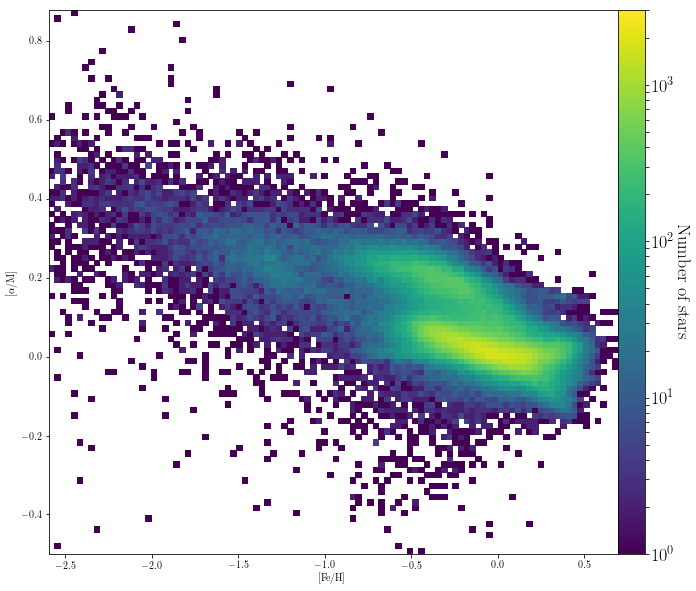

In [8]:
# Make beautiful latex
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Find where parameters are known
mask = np.where((data['FE_H'] > -9999) & (data['ALPHA_M'] > -9999))
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
hist2d(fig,ax,data['FE_H'][mask],data['ALPHA_M'][mask],bins=100,
       vmin=1,vmax=3e3,norm='log',clabel='Number of stars')
plt.xlabel('[Fe/H]')
plt.ylabel(r'[$\alpha$/M]')

In [ ]:
i=0
spectra = apread.aspcapStar(data['LOCATION_ID'][i],data['APOGEE_ID'][i],ext=1,header=False,aspcapWavegrid=True)